In [168]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [169]:
dataset = pd.read_csv('spy_train_set_mod.csv', index_col='period')
dataset = dataset.drop(columns=['rvol', 'rvpoc'])
dataset['tpoc_price_high_dist_prev_period'] = dataset['tpoc_price_high_dist_prev_period'].abs()
dataset['vpoc_price_high_dist_prev_period'] = dataset['vpoc_price_high_dist_prev_period'].abs()

In [170]:
dataset.columns

Index(['movement', 'movement_prev_period', 'chg_prev_period',
       'vpoc_prev_period', 'total_volume_prev_period',
       'vpoc_tpoc_dist_prev_period', 'vpoc_close_dist_prev_period',
       'tpoc_close_dist_prev_period', 'vpoc_price_high_dist_prev_period',
       'vpoc_price_low_dist_prev_period', 'tpoc_price_high_dist_prev_period',
       'tpoc_price_low_dist_prev_period', 'price_std_prev_period',
       'price_skew_prev_period', 'price_kurt_prev_period',
       'vol_price_std_prev_period', 'vol_price_skew_prev_period',
       'vol_price_kurt_prev_period', 'trapped_longs_prev_period',
       'trapped_shorts_prev_period', 'trapped_shorts_at_extremes_prev_period',
       'trapped_longs_at_extremes_prev_period'],
      dtype='object')

In [171]:
categorical_features = [c for c in dataset.columns if 'trapped' in c]
dataset[categorical_features] = dataset[categorical_features].astype(int)

In [172]:
dataset[categorical_features]

,trapped_longs_prev_period,trapped_shorts_prev_period,trapped_shorts_at_extremes_prev_period,trapped_longs_at_extremes_prev_period
period,,,,
2024-03-26 09:35:00,0,1,1,0
2024-03-26 09:40:00,1,0,0,0
2024-03-26 09:45:00,0,1,1,0
2024-03-26 09:50:00,0,1,1,0
2024-03-26 09:55:00,1,0,0,1
...,...,...,...,...
2024-04-26 15:35:00,1,0,0,0
2024-04-26 15:40:00,1,0,0,0
2024-04-26 15:45:00,1,0,0,0


In [173]:
dataset

,movement,movement_prev_period,chg_prev_period,vpoc_prev_period,total_volume_prev_period,vpoc_tpoc_dist_prev_period,vpoc_close_dist_prev_period,tpoc_close_dist_prev_period,vpoc_price_high_dist_prev_period,vpoc_price_low_dist_prev_period,...,price_std_prev_period,price_skew_prev_period,price_kurt_prev_period,vol_price_std_prev_period,vol_price_skew_prev_period,vol_price_kurt_prev_period,trapped_longs_prev_period,trapped_shorts_prev_period,trapped_shorts_at_extremes_prev_period,trapped_longs_at_extremes_prev_period
period,,,,,,,,,,,,,,,,,,,,,
2024-03-26 09:35:00,0,1,0.0249,102621.0,277252.0,-0.081,-0.130,-0.049,0.206,0.287,...,0.154,-0.132,-1.380,13343.505,7.165,53.192,0,1,1,0
2024-03-26 09:40:00,0,0,-0.0485,6333.0,108210.0,0.177,0.191,0.014,0.125,0.292,...,0.087,0.928,1.374,1427.646,1.262,1.483,1,0,0,0
2024-03-26 09:45:00,1,1,0.0211,8650.0,135346.0,0.000,-0.321,-0.321,0.327,0.000,...,0.092,0.260,-1.013,1778.430,1.534,2.873,0,1,1,0
2024-03-26 09:50:00,1,1,0.0025,8100.0,61379.0,0.032,-0.054,-0.086,0.123,0.065,...,0.047,1.069,0.779,1330.183,3.274,14.367,0,1,1,0
2024-03-26 09:55:00,1,0,-0.0447,4300.0,41548.0,0.261,0.251,-0.010,0.020,0.321,...,0.099,-0.746,-0.571,764.350,2.532,8.431,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 15:35:00,0,0,-0.0755,6557.0,87775.0,0.057,0.125,0.068,0.260,0.169,...,0.098,0.702,0.483,1617.847,1.267,0.880,1,0,0,0
2024-04-26 15:40:00,0,0,-0.0226,6470.0,80154.0,0.010,0.076,0.066,0.081,0.141,...,0.051,-0.511,-0.178,1225.928,1.938,4.509,1,0,0,0
2024-04-26 15:45:00,0,0,-0.1049,12834.0,152471.0,-0.422,0.037,0.459,0.543,0.122,...,0.165,-1.437,1.198,2698.069,2.235,5.654,1,0,0,0


In [98]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(2, random_state=1, whiten=True)
train_embeddings = pca.fit_transform(dataset.drop(columns=['movement']).values)

px.scatter(dataset.reset_index(),x=train_embeddings[:,0],y=train_embeddings[:,1],color=dataset.movement.values,hover_data="period")

In [174]:
train = dataset.reset_index()[~dataset.reset_index().period.between("2024-04-22","2024-04-27")]
test = dataset.reset_index()[dataset.reset_index().period.between("2024-04-22","2024-04-27")]

train_embeddings = pca.fit_transform(train.drop(columns=['movement', 'period']).values)

px.scatter(train.reset_index(),x=train_embeddings[:,0],y=train_embeddings[:,1],color=train.movement.values,hover_data="period")

In [100]:
test_embeddings = pca.transform(test.drop(columns=['movement', 'period']).values)

px.scatter(test.reset_index(),x=test_embeddings[:,0],y=test_embeddings[:,1],color=test.movement.values,hover_data="period")

In [152]:
train = dataset.reset_index()[~dataset.reset_index().period.between("2024-04-22","2024-04-27")]
test = dataset.reset_index()[dataset.reset_index().period.between("2024-04-22","2024-04-27")]
train = train[train.period.str.contains('09:35:00')]
test = test[test.period.str.contains('09:35:00')]

train_embeddings = pca.fit_transform(train.drop(columns=['movement', 'period']).values)

px.scatter(train.reset_index(),x=train_embeddings[:,0],y=train_embeddings[:,1],color=train.movement.values,hover_data=train.columns)

In [76]:
train[train.period=="2024-04-15 09:35:00"]

,period,movement,movement_prev_period,chg_prev_period,vpoc_prev_period,total_volume_prev_period,vpoc_tpoc_dist_prev_period,vpoc_close_dist_prev_period,tpoc_close_dist_prev_period,vpoc_price_high_dist_prev_period,...,price_std_prev_period,price_skew_prev_period,price_kurt_prev_period,vol_price_std_prev_period,vol_price_skew_prev_period,vol_price_kurt_prev_period,trapped_longs_prev_period,trapped_shorts_prev_period,trapped_shorts_at_extremes_prev_period,trapped_longs_at_extremes_prev_period
924,2024-04-15 09:35:00,1,0,-0.1318,299404.0,824138.0,0.251,0.679,0.428,0.0,...,0.148,-0.263,-0.084,42890.057,6.017,38.125,1,0,0,1


In [77]:
test_embeddings = pca.transform(test.drop(columns=['movement', 'period']).values)

px.scatter(test.reset_index(),x=test_embeddings[:,0],y=test_embeddings[:,1],color=test.movement.values,hover_data="period")

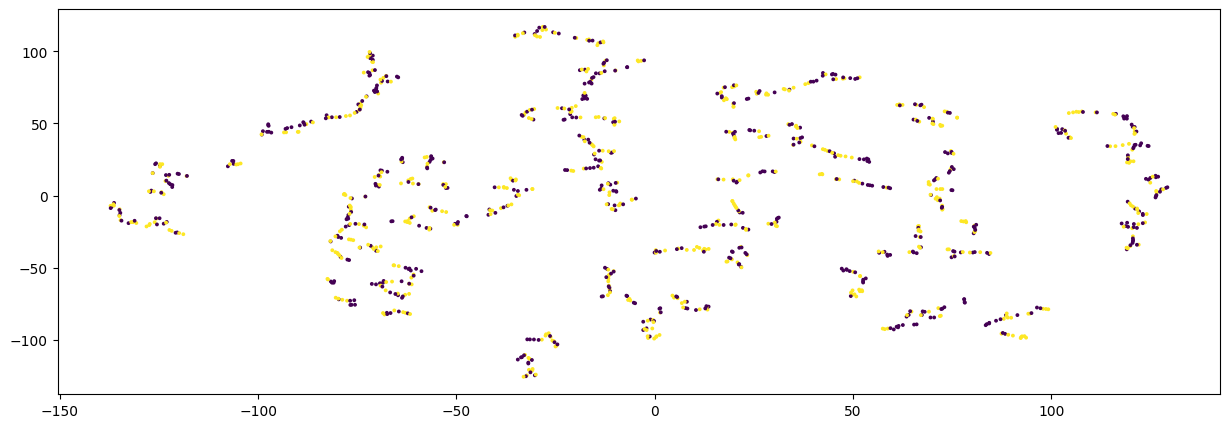

In [124]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
plt.figure(figsize=(15,5))
tsne = TSNE(n_components=2,perplexity=5,n_iter=5000)
train_embeddings = tsne.fit_transform(dataset.drop(columns=['movement']).values)
plt.scatter(train_embeddings[:,0],train_embeddings[:,1],c=dataset.movement.values, s=3)

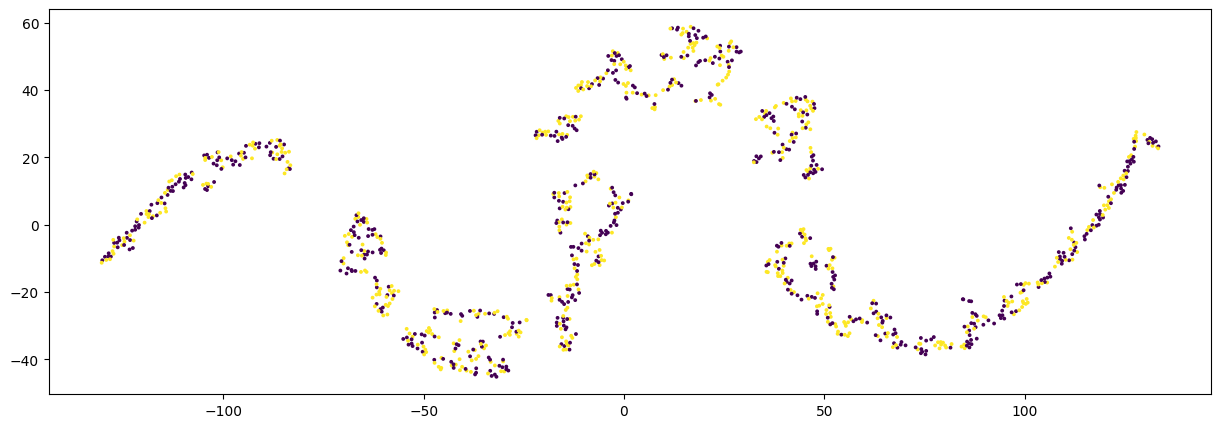

In [125]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
plt.figure(figsize=(15,5))
tsne = TSNE(n_components=2,perplexity=15,n_iter=5000)
train_embeddings = tsne.fit_transform(dataset.drop(columns=['movement']).values)
plt.scatter(train_embeddings[:,0],train_embeddings[:,1],c=dataset.movement.values, s=3)

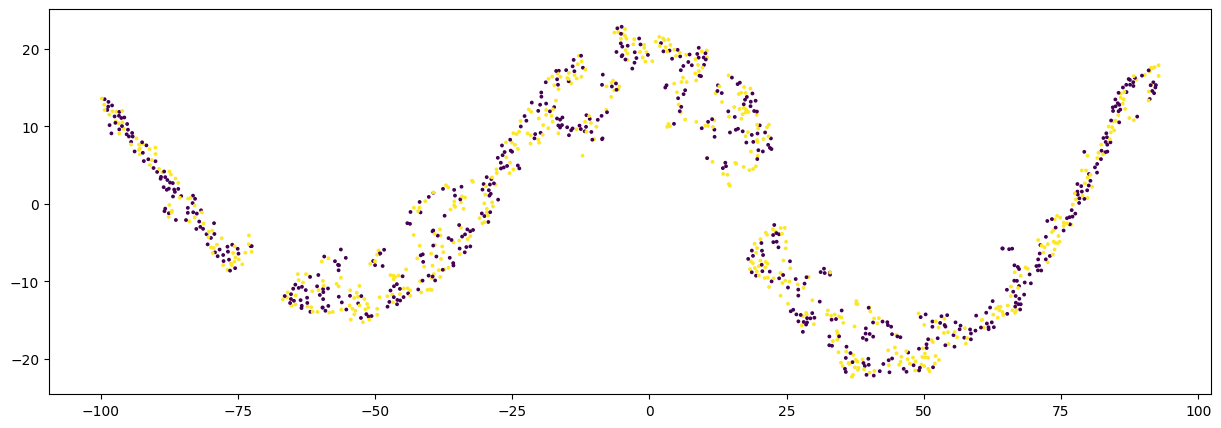

In [126]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
plt.figure(figsize=(15,5))
tsne = TSNE(n_components=2,perplexity=30,n_iter=5000)
train_embeddings = tsne.fit_transform(dataset.drop(columns=['movement']).values)
plt.scatter(train_embeddings[:,0],train_embeddings[:,1],c=dataset.movement.values, s=3)

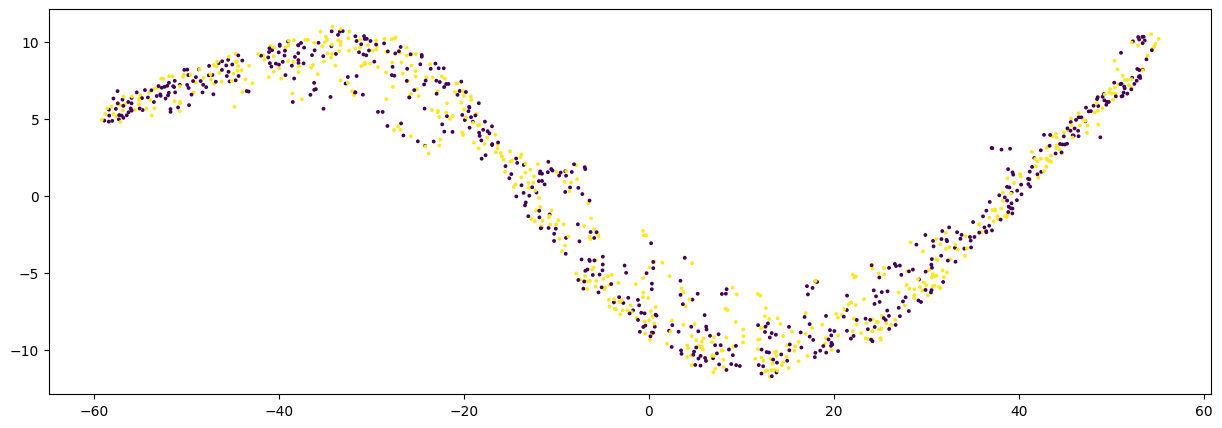

In [127]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
plt.figure(figsize=(15,5))
tsne = TSNE(n_components=2,perplexity=60,n_iter=5000)
train_embeddings = tsne.fit_transform(dataset.drop(columns=['movement']).values)
plt.scatter(train_embeddings[:,0],train_embeddings[:,1],c=dataset.movement.values, s=3)

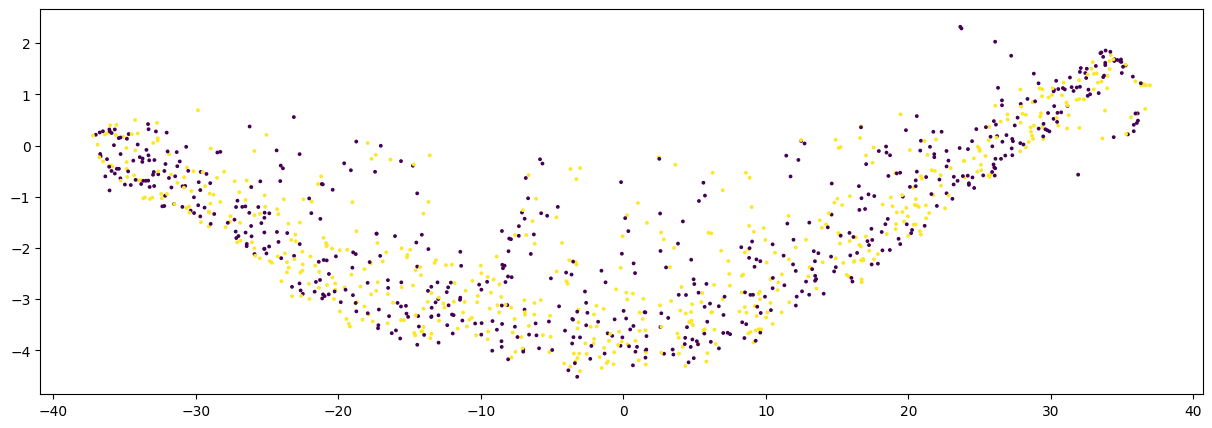

In [128]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
plt.figure(figsize=(15,5))
tsne = TSNE(n_components=2,perplexity=100,n_iter=5000)
train_embeddings = tsne.fit_transform(dataset.drop(columns=['movement']).values)
plt.scatter(train_embeddings[:,0],train_embeddings[:,1],c=dataset.movement.values, s=3)

In [102]:
import numpy as np


def tune_threshold(y_probs, threshold):
    
    """ Predicts target with varying the threshold"""
    y_pred_with_threshold = []

    for prob in y_probs[:,1]:
            if prob > threshold:
                y_pred_with_threshold.append(1)
            else:
                y_pred_with_threshold.append(0)
    return np.array(y_pred_with_threshold)

In [166]:
from sklearn.tree import DecisionTreeClassifier
all_data = pd.concat([train,test])

model = DecisionTreeClassifier(random_state=0).fit(all_data.drop(columns=['movement', 'period']), all_data.movement)
# model = DecisionTreeClassifier(random_state=0).fit(train.drop(columns=['movement', 'period']), train.movement)


# print("Train")
# c = 0.5
# y_probs = model.predict_proba(train.drop(columns=['movement', 'period']))
# y_pred = tune_threshold(y_probs, threshold=c)
# print(f'AUC: {roc_auc_score(train.movement.values, y_pred)}')
# print(classification_report(train.movement.values, y_pred))
# print(confusion_matrix(train.movement, y_pred))
# print("Test")
# y_probs = model.predict_proba(test.drop(columns=['movement', 'period']))
# y_pred = tune_threshold(y_probs, threshold=c)
# print(f'AUC: {roc_auc_score(test.movement.values, y_pred)}')
# print(classification_report(test.movement.values, y_pred))
# print(confusion_matrix(test.movement.values, y_pred))

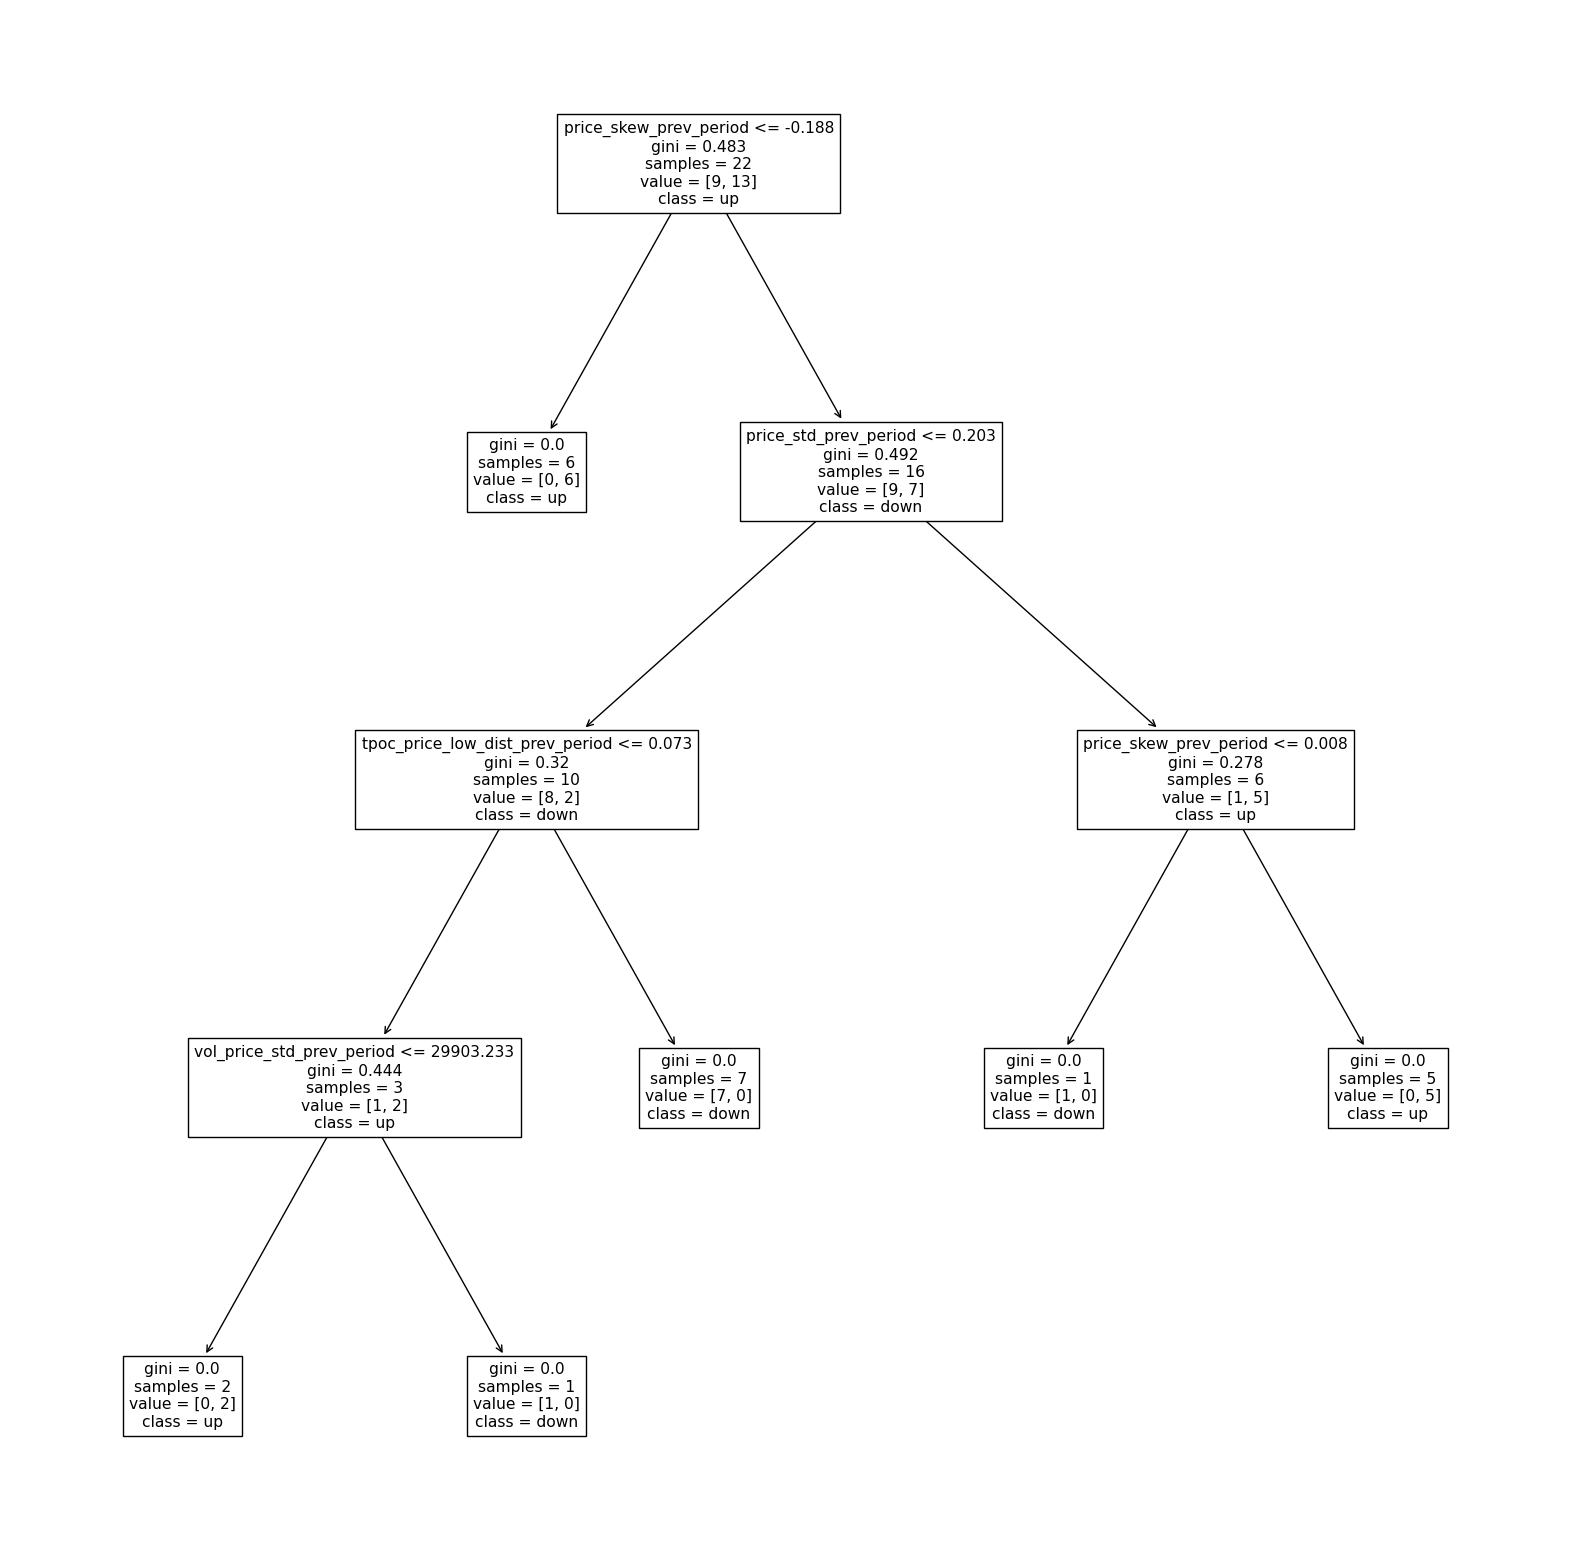

In [167]:
from sklearn import tree
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
# tree.plot_tree(model, max_depth=4, feature_names=train.drop(columns=['movement', 'period']).columns, class_names=['down','up'], fontsize=8)
tree.plot_tree(model, feature_names=all_data.drop(columns=['movement', 'period']).columns, class_names=['down','up'])
plt.show()

In [158]:
all_data[all_data.price_skew_prev_period > -0.188][["movement","movement_prev_period","price_skew_prev_period"]]

,movement,movement_prev_period,price_skew_prev_period
0,0,1,-0.132
77,1,0,0.336
154,1,0,1.269
231,0,1,-0.023
308,0,0,-0.111
462,0,1,0.630
616,0,0,0.088
693,0,0,-0.017
770,0,0,0.422
1001,0,1,0.384


In [83]:
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "auc"
param['learning_rate'] = 0.01
param['n_estimators'] = 5000
param['early_stopping_rounds'] = 100
# param['gamma'] = 0
param['reg_alpha'] = 0.0
param['reg_lambda'] = 0.1
param['max_depth'] = 5
param['min_child_weight'] = 4
param['max_delta_step'] = 0
param['subsample'] = 0.6
param['colsample_bytree'] = 0.7
param['seed'] = 0
param['base_score'] = 0.5
param['n_jobs'] = -1
# param['verbosity'] = 3


model = xgb.XGBClassifier().set_params(**param)

model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=4, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=5000,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)

In [43]:
periods_in_day = 77
days_in_dataset = int(dataset.shape[0] / 77)

dataset['period_idx'] = [i for _ in range(days_in_dataset) for i in range(periods_in_day)]
dataset

,movement,movement_prev_period,chg_prev_period,vpoc_prev_period,total_volume_prev_period,vpoc_tpoc_dist_prev_period,vpoc_close_dist_prev_period,tpoc_close_dist_prev_period,vpoc_price_high_dist_prev_period,vpoc_price_low_dist_prev_period,...,vol_price_std_prev_period,vol_price_skew_prev_period,vol_price_kurt_prev_period,trapped_longs_prev_period,trapped_shorts_prev_period,trapped_shorts_at_extremes_prev_period,trapped_longs_at_extremes_prev_period,rvol,rvpoc,period_idx
period,,,,,,,,,,,,,,,,,,,,,
2024-03-26 09:35:00,0,1,0.0249,102621.0,277252.0,-0.081,-0.130,-0.049,-0.206,0.287,...,13343.505,7.165,53.192,0,1,1,0,-277252.000000,-102621.000000,0
2024-03-26 09:40:00,0,0,-0.0485,6333.0,108210.0,0.177,0.191,0.014,-0.125,0.292,...,1427.646,1.262,1.483,1,0,0,0,0.390295,0.061713,1
2024-03-26 09:45:00,1,1,0.0211,8650.0,135346.0,0.000,-0.321,-0.321,-0.327,0.000,...,1778.430,1.534,2.873,0,1,1,0,1.250772,1.365861,2
2024-03-26 09:50:00,1,1,0.0025,8100.0,61379.0,0.032,-0.054,-0.086,-0.123,0.065,...,1330.183,3.274,14.367,0,1,1,0,0.453497,0.936416,3
2024-03-26 09:55:00,1,0,-0.0447,4300.0,41548.0,0.261,0.251,-0.010,-0.020,0.321,...,764.350,2.532,8.431,1,0,0,1,0.676909,0.530864,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-17 15:35:00,1,1,0.0923,10695.0,134415.0,-0.250,-0.331,-0.081,-0.474,0.162,...,1755.854,2.223,8.066,0,1,0,0,1.149219,1.256757,72
2024-04-17 15:40:00,1,0,-0.0854,13063.0,152817.0,-0.021,0.407,0.428,-0.044,0.546,...,2891.442,1.774,3.671,1,0,0,0,1.136904,1.221412,73
2024-04-17 15:45:00,0,1,0.1088,38091.0,221073.0,-0.095,-0.377,-0.282,-0.521,0.454,...,5115.527,5.576,36.173,0,1,0,0,1.446652,2.915946,74


In [84]:
# dataset.iloc[:924,:][dataset['trapped_longs_at_extremes_prev_period']==1].movement.value_counts()
# dataset.iloc[:,:][dataset['trapped_shorts_at_extremes_prev_period']==1].shape

In [44]:
# X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1],dataset.iloc[:,-1],test_size=0.7, random_state=0)
import numpy as np

# feature_names = dataset.drop(columns=['movement'] + categorical_features).columns
feature_names = dataset.drop(columns=['movement']).columns
# dataset_shuffled = dataset.sample(frac=1)
# dataset_shuffled = dataset[dataset['trapped_longs_at_extremes_prev_period']==1].sample(frac=1)
# dataset_shuffled = dataset[dataset['trapped_shorts_at_extremes_prev_period']==1]
dataset_shuffled = dataset.copy(True)

# size = int(0.7 * dataset_shuffled.shape[0])
size = 924
# size = 847
# size = 770
# dataset_shuffled['split'] = 0
# dataset_shuffled.iloc[size:,-1] = 1

# x, y = dataset_shuffled[feature_names].values, dataset_shuffled['split'].values

# model = model.fit(x, y, eval_set=[(x, y)])

# def tune_threshold(y_probs, threshold):
    
#     """ Predicts target with varying the threshold"""
#     y_pred_with_threshold = []

#     for prob in y_probs[:,1]:
#             if prob > threshold:
#                 y_pred_with_threshold.append(1)
#             else:
#                 y_pred_with_threshold.append(0)
#     return np.array(y_pred_with_threshold)

# print("Split Validation")
# c = 0.5
# y_probs = model.predict_proba(x)
# y_pred = tune_threshold(y_probs, threshold=c)
# print(f'AUC: {roc_auc_score(y, y_pred)}')
# print(classification_report(y, y_pred))
# print(confusion_matrix(y, y_pred))

In [45]:
feature_names

Index(['movement_prev_period', 'chg_prev_period', 'vpoc_prev_period',
       'total_volume_prev_period', 'vpoc_tpoc_dist_prev_period',
       'vpoc_close_dist_prev_period', 'tpoc_close_dist_prev_period',
       'vpoc_price_high_dist_prev_period', 'vpoc_price_low_dist_prev_period',
       'tpoc_price_high_dist_prev_period', 'tpoc_price_low_dist_prev_period',
       'price_std_prev_period', 'price_skew_prev_period',
       'price_kurt_prev_period', 'vol_price_std_prev_period',
       'vol_price_skew_prev_period', 'vol_price_kurt_prev_period',
       'trapped_longs_prev_period', 'trapped_shorts_prev_period',
       'trapped_shorts_at_extremes_prev_period',
       'trapped_longs_at_extremes_prev_period', 'rvol', 'rvpoc', 'period_idx'],
      dtype='object')

In [88]:
X_train, X_test, y_train, y_test = dataset_shuffled.iloc[:size,:][feature_names], dataset_shuffled.iloc[size:,:][feature_names], dataset_shuffled.iloc[:size,:]["movement"], dataset_shuffled.iloc[size:,:]["movement"]

model = model.fit(X_train.values, y_train.values, eval_set=[(X_test.values, y_test.values)])

[0]	validation_0-auc:0.42449
[1]	validation_0-auc:0.42574
[2]	validation_0-auc:0.42048
[3]	validation_0-auc:0.44437
[4]	validation_0-auc:0.46066
[5]	validation_0-auc:0.45231
[6]	validation_0-auc:0.45854
[7]	validation_0-auc:0.45280
[8]	validation_0-auc:0.46138
[9]	validation_0-auc:0.46372


[10]	validation_0-auc:0.46387
[11]	validation_0-auc:0.47566
[12]	validation_0-auc:0.47732
[13]	validation_0-auc:0.47838
[14]	validation_0-auc:0.48035
[15]	validation_0-auc:0.48314
[16]	validation_0-auc:0.48239
[17]	validation_0-auc:0.48662
[18]	validation_0-auc:0.49206
[19]	validation_0-auc:0.49879
[20]	validation_0-auc:0.50053
[21]	validation_0-auc:0.50673
[22]	validation_0-auc:0.51209
[23]	validation_0-auc:0.52003
[24]	validation_0-auc:0.52381
[25]	validation_0-auc:0.52373
[26]	validation_0-auc:0.52770
[27]	validation_0-auc:0.52555
[28]	validation_0-auc:0.52593
[29]	validation_0-auc:0.52260
[30]	validation_0-auc:0.52116
[31]	validation_0-auc:0.52116
[32]	validation_0-auc:0.52162
[33]	validation_0-auc:0.51708
[34]	validation_0-auc:0.51701
[35]	validation_0-auc:0.51723
[36]	validation_0-auc:0.51338
[37]	validation_0-auc:0.51096
[38]	validation_0-auc:0.51043
[39]	validation_0-auc:0.50945
[40]	validation_0-auc:0.50937
[41]	validation_0-auc:0.51172
[42]	validation_0-auc:0.50967
[43]	valid

In [89]:
print("Train")
c = 0.5
y_probs = model.predict_proba(X_train.values)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(y_train.values, y_pred)}')
print(classification_report(y_train.values, y_pred))
print(confusion_matrix(y_train, y_pred))
print("Test")
y_probs = model.predict_proba(X_test.values)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(y_test.values, y_pred)}')
print(classification_report(y_test.values, y_pred))
print(confusion_matrix(y_test.values, y_pred))

Train
AUC: 0.7283452023988006
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       460
           1       0.73      0.73      0.73       464

    accuracy                           0.73       924
   macro avg       0.73      0.73      0.73       924
weighted avg       0.73      0.73      0.73       924

[[334 126]
 [125 339]]
Test
AUC: 0.5507936507936508
              precision    recall  f1-score   support

           0       0.60      0.49      0.54       126
           1       0.50      0.61      0.55       105

    accuracy                           0.55       231
   macro avg       0.55      0.55      0.55       231
weighted avg       0.56      0.55      0.55       231

[[62 64]
 [41 64]]


In [41]:
list(zip(y_test.index,y_test.values,y_pred,y_probs.max(axis=1)))

[('2024-04-15 09:35:00', 1, 0, 0.6453663),
 ('2024-04-15 09:40:00', 1, 0, 0.6453663),
 ('2024-04-15 09:45:00', 0, 0, 0.6453663),
 ('2024-04-15 09:50:00', 0, 0, 0.6453663),
 ('2024-04-15 09:55:00', 0, 0, 0.6453663),
 ('2024-04-15 10:00:00', 0, 0, 0.6453663),
 ('2024-04-15 10:05:00', 0, 0, 0.6453663),
 ('2024-04-15 10:10:00', 0, 0, 0.6453663),
 ('2024-04-15 10:15:00', 1, 0, 0.6453663),
 ('2024-04-15 10:20:00', 0, 0, 0.6453663),
 ('2024-04-15 10:25:00', 0, 0, 0.6453663),
 ('2024-04-15 10:30:00', 0, 0, 0.6453663),
 ('2024-04-15 10:35:00', 1, 0, 0.6453663),
 ('2024-04-15 10:40:00', 0, 0, 0.6453663),
 ('2024-04-15 10:45:00', 0, 0, 0.6453663),
 ('2024-04-15 10:50:00', 0, 0, 0.6453663),
 ('2024-04-15 10:55:00', 0, 0, 0.6453663),
 ('2024-04-15 11:00:00', 1, 0, 0.6453663),
 ('2024-04-15 11:05:00', 0, 0, 0.6453663),
 ('2024-04-15 11:10:00', 0, 0, 0.6453663),
 ('2024-04-15 11:15:00', 1, 0, 0.6453663),
 ('2024-04-15 11:20:00', 1, 0, 0.6453663),
 ('2024-04-15 11:25:00', 1, 0, 0.6453663),
 ('2024-04-

In [167]:
X_test[(y_test == 1) & (y_pred == 0)].head(5)

,movement_prev_period,chg_prev_period,vpoc_prev_period,total_volume_prev_period,vpoc_tpoc_dist_prev_period,vpoc_close_dist_prev_period,tpoc_close_dist_prev_period,vpoc_price_high_dist_prev_period,vpoc_price_low_dist_prev_period,tpoc_price_high_dist_prev_period,...,price_std_prev_period,price_skew_prev_period,price_kurt_prev_period,vol_price_std_prev_period,vol_price_skew_prev_period,vol_price_kurt_prev_period,trapped_longs_prev_period,trapped_shorts_prev_period,trapped_shorts_at_extremes_prev_period,trapped_longs_at_extremes_prev_period
period,,,,,,,,,,,,,,,,,,,,,
2024-03-27 11:05:00,0,-0.0012,32455.0,92202.0,-0.020,-0.035,-0.015,-0.143,0.092,-0.123,...,0.052,-0.026,0.032,4434.717,6.859,48.251,0,1,1,0
2024-04-03 13:10:00,1,0.0158,3309.0,46667.0,0.023,-0.027,-0.050,-0.100,0.127,-0.123,...,0.047,-0.013,0.121,772.482,1.435,2.224,0,1,0,0
2024-04-11 13:10:00,1,0.0777,20691.0,236897.0,-0.259,-0.266,-0.007,-0.522,0.165,-0.263,...,0.182,-0.940,-0.165,3739.499,2.404,7.051,0,1,0,0
2024-04-11 11:15:00,1,0.0384,3400.0,55326.0,-0.137,-0.158,-0.021,-0.373,0.039,-0.236,...,0.090,-0.813,0.634,759.248,1.593,2.750,0,1,0,0
2024-04-02 12:55:00,0,-0.0064,7470.0,50748.0,0.110,0.015,-0.095,-0.046,0.143,-0.156,...,0.049,0.519,-1.043,1315.790,3.070,12.242,1,0,0,0


In [170]:
X_test.loc["2024-04-12 09:45:00",:]

KeyError: '2024-04-12 09:45:00'

In [179]:
dataset = pd.read_csv('diabetes.csv')

# X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1],dataset.iloc[:,-1],test_size=0.7, random_state=0)
feature_names = dataset.drop(columns=['Outcome']).columns
dataset_shuffled = dataset.sample(frac=1)

size = int(0.5 * dataset.shape[0])
dataset_shuffled.loc[:size,'split'] = 0
dataset_shuffled.loc[size:,'split'] = 1

x, y = dataset_shuffled[feature_names].values, dataset_shuffled['split'].values

model = model.fit(x, y, eval_set=[(x,y)])

def tune_threshold(y_probs, threshold):
    
    """ Predicts target with varying the threshold"""
    y_pred_with_threshold = []

    for prob in y_probs[:,1]:
            if prob > threshold:
                y_pred_with_threshold.append(1)
            else:
                y_pred_with_threshold.append(0)
    return y_pred_with_threshold

print("Split Validation")
c = 0.5
y_probs = model.predict_proba(x)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(y, y_pred)}')
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

print('============================')

X_train, X_test, y_train, y_test = dataset_shuffled.iloc[:size,:][feature_names].values, dataset_shuffled.iloc[size:,:][feature_names].values, dataset_shuffled.iloc[:size,:]["Outcome"].values, dataset_shuffled.iloc[size:,:]["Outcome"].values

model = model.fit(X_train, y_train, eval_set=[(X_test,y_test)])
print("Train")
c = 0.5
y_probs = model.predict_proba(X_train)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(y_train, y_pred)}')
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))
print("Test")
y_probs = model.predict_proba(X_test)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[14:10:54] ======== Monitor (0): HostSketchContainer ========
[14:10:54] AllReduce: 0.000138s, 1 calls @ 138us

[14:10:54] MakeCuts: 0.000176s, 1 calls @ 176us

[14:10:54] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
[0]	validation_0-auc:0.77369
[1]	validation_0-auc:0.80953
[2]	validation_0-auc:0.80505
[3]	validation_0-auc:0.81984
[4]	validation_0-auc:0.85209
[5]	validation_0-auc:0.85117
[6]	validation_0-auc:0.86078
[7]	validation_0-auc:0.86332
[8]	validation_0-auc:0.86332
[9]	validation_0-auc:0.85803
[10]	validation_0-auc:0.85475
[11]	validation_0-auc:0.86428
[12]	validation_0-auc:0.87206
[13]	validation_0-auc:0.87268
[14]	validation_0-auc:0.87525
[15]	validation_0-auc:0.87590
[16]	validation_0-auc:0.87564
[17]	validation_0-auc:0.88214
[18]	validation_0-auc:0.89373
[19]	validation_0-auc:0.88976
[20]	validation_0-auc:0.89026
[21]	validation_0-auc:0.89261
[22]	validat

[26]	validation_0-auc:0.89189
[27]	validation_0-auc:0.89009
[28]	validation_0-auc:0.89194
[29]	validation_0-auc:0.89289
[30]	validation_0-auc:0.89536
[31]	validation_0-auc:0.89508
[32]	validation_0-auc:0.89497
[33]	validation_0-auc:0.89284
[34]	validation_0-auc:0.89429
[35]	validation_0-auc:0.89373
[36]	validation_0-auc:0.89435
[37]	validation_0-auc:0.89373
[38]	validation_0-auc:0.89961
[39]	validation_0-auc:0.89931
[40]	validation_0-auc:0.89947
[41]	validation_0-auc:0.90026
[42]	validation_0-auc:0.90286
[43]	validation_0-auc:0.90275
[44]	validation_0-auc:0.90197
[45]	validation_0-auc:0.89978
[46]	validation_0-auc:0.90001
[47]	validation_0-auc:0.89863
[48]	validation_0-auc:0.90006
[49]	validation_0-auc:0.90230
[50]	validation_0-auc:0.90247
[51]	validation_0-auc:0.90367
[52]	validation_0-auc:0.90230
[53]	validation_0-auc:0.90124
[54]	validation_0-auc:0.90012
[55]	validation_0-auc:0.90017
[56]	validation_0-auc:0.90079
[57]	validation_0-auc:0.90079
[58]	validation_0-auc:0.89973
[59]	valid

c:\Users\zeyad\Desktop\Intraday\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zeyad\Desktop\Intraday\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zeyad\Desktop\Intraday\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[45]	validation_0-auc:0.83788
[46]	validation_0-auc:0.83844
[47]	validation_0-auc:0.83847
[48]	validation_0-auc:0.83864
[49]	validation_0-auc:0.83750
[50]	validation_0-auc:0.83639
[51]	validation_0-auc:0.83653
[52]	validation_0-auc:0.83724
[53]	validation_0-auc:0.83727
[54]	validation_0-auc:0.83885
[55]	validation_0-auc:0.83773
[56]	validation_0-auc:0.83653
[14:10:55] ======== Monitor (0): Learner ========
[14:10:55] Configure: 0.001001s, 1 calls @ 1001us

[14:10:55] EvalOneIter: 0.016486s, 58 calls @ 16486us

[14:10:55] GetGradient: 0.003579s, 58 calls @ 3579us

[14:10:55] PredictRaw: 0.000271s, 58 calls @ 271us

[14:10:55] UpdateOneIter: 0.041619s, 58 calls @ 41619us

[14:10:55] ======== Monitor (0): GBTree ========
[14:10:55] BoostNewTrees: 0.036961s, 58 calls @ 36961us

[14:10:55] CommitModel: 6e-05s, 58 calls @ 60us

[14:10:55] ======== Monitor (0): HistUpdater ========
[14:10:55] BuildHistogram: 0.005813s, 116 calls @ 5813us

[14:10:55] EvaluateSplits: 0.007379s, 174 calls @ 7379

In [182]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
import plotly.express as px


pca = PCA(2).fit(X_train)
# px.line(x=range(0,len(pca.explained_variance_)),y= pca.explained_variance_)
pcs = pca.fit_transform(StandardScaler().fit_transform(X_train))
pc1 = pcs[:,0]
pc2 = pcs[:,1]
px.scatter(x=pc1,y=pc2, color=y_train)

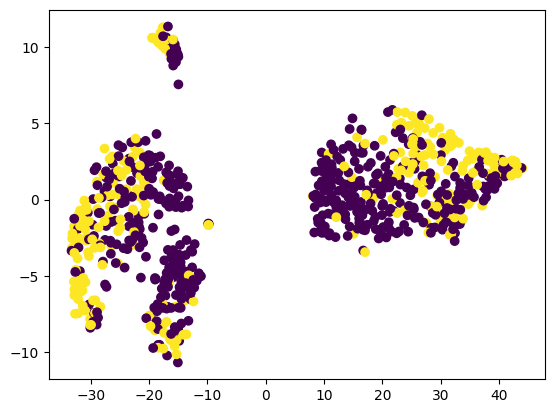

In [192]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=60,n_iter=2000)
train_embeddings = tsne.fit_transform(dataset.drop(columns=['Outcome']).values)
plt.scatter(train_embeddings[:,0],train_embeddings[:,1],c=dataset.Outcome.values)